In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('nsfg.csv')
df.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9358 entries, 0 to 9357
Data columns (total 10 columns):
caseid          9358 non-null int64
outcome         9358 non-null int64
birthwgt_lb1    6485 non-null float64
birthwgt_oz1    6391 non-null float64
prglngth        9358 non-null int64
nbrnaliv        6485 non-null float64
agecon          9358 non-null int64
agepreg         9109 non-null float64
hpagelb         6485 non-null float64
wgt2013_2015    9358 non-null float64
dtypes: float64(6), int64(4)
memory usage: 731.2 KB


In [5]:
df.describe()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
count,9358.000000,9358.000000,6485.000000,6391.000000,9358.000000,6485.000000,9358.000000,9109.000000,6485.000000,9358.000000
mean,65502.392605,1.773990,8.055204,7.213895,29.896345,1.018042,2446.330199,2494.934570,28.992136,10759.200147
std,2953.471315,1.348648,11.178893,8.254885,13.685389,0.160433,579.392363,578.099231,10.367124,11400.179222
min,60418.000000,1.000000,0.000000,0.000000,0.000000,1.000000,750.000000,825.000000,5.000000,1859.105000
25%,62875.750000,1.000000,6.000000,3.000000,14.000000,1.000000,1983.000000,2041.000000,23.000000,4340.053407
50%,65499.000000,1.000000,7.000000,6.000000,38.000000,1.000000,2366.000000,2416.000000,27.000000,7062.994157
75%,68111.000000,2.000000,8.000000,11.000000,39.000000,1.000000,2850.000000,2900.000000,33.000000,12629.322980
max,70619.000000,6.000000,99.000000,99.000000,48.000000,8.000000,4350.000000,4350.000000,99.000000,75399.410000


In [6]:
df.shape

(9358, 10)

In [7]:
df.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [9]:
df['birthwgt_oz1'].head()

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

- birthwgt_lb1 : The pound part of the weight
- birthwgt_oz1 : The ounce part of the weight

In [16]:
pounds = df['birthwgt_lb1']
ounces  = df['birthwgt_oz1']

In [17]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [18]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [19]:
pounds.isna().sum()

2873

In [20]:
ounces.isna().sum()

2967

In [21]:
ounces.replace([98, 99], np.NAN, inplace=True)

In [22]:
pounds = pounds.replace([98, 99], np.nan)

In [23]:
birth_weight = pounds + (ounces/16)
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

In [24]:
df.outcome.value_counts().sort_index()

1    6489
2     947
3      86
4    1469
5     118
6     249
Name: outcome, dtype: int64

In [25]:
df.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [26]:
df['nbrnaliv'].value_counts().sort_index()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [27]:
df['nbrnaliv'].replace(8, np.NAN, inplace=True)

In [28]:
df['nbrnaliv'].value_counts().sort_index()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

In [29]:
agecon = df['agecon']/100
agepreg = df['agepreg']/100

In [30]:
pregnancy_length = agepreg - agecon
pregnancy_length.head()

0    0.75
1    0.67
2    0.67
3     NaN
4    0.75
dtype: float64

In [31]:
pregnancy_length.describe()

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

In [34]:
import seaborn as sns
sns.set()

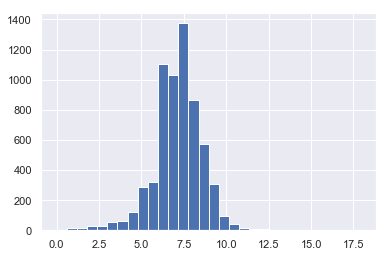

In [36]:
plt.hist(birth_weight.dropna(), 30)
plt.show()

- 39 Weeks
- 37 Weeks

In [38]:
preterm = df['prglngth'] < 37

In [39]:
preterm.describe()

count      9358
unique        2
top       False
freq       5616
Name: prglngth, dtype: object

In [40]:
preterm.sum()

3742

In [41]:
preterm.mean()

0.39987176747168196

In [42]:
preterm_weight = birth_weight[preterm]

In [43]:
preterm_weight.mean()

5.577598314606742

In [44]:
fullterm_weight = birth_weight[~preterm]
fullterm_weight.mean()

7.372323879231473